In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data/babies.csv')/

In [4]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [6]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


We'll change the data so that the columns will be more obvious and the numbers will be in the metric form (weight in kg, height in cm) 

In [7]:
df['birth weight'] = df['bwt'] * 0.0283495231

In [8]:
df = df.drop('bwt', axis = 1)

In [9]:
df['height'] = df['height']*2.54
df['weight'] = df['weight']*0.45359237

In [10]:
df.rename(columns={'gestation': 'pregnancy duration'}, inplace=True)

Let's look at the number of smokers out of the pregnant women in the study. As we know, in that time cigarettes were very common, also within pregnant women.

C:\Users\Tamir\AppData\Local\Temp\ipykernel_26948\1182464704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'smoke', palette = 'coolwarm')


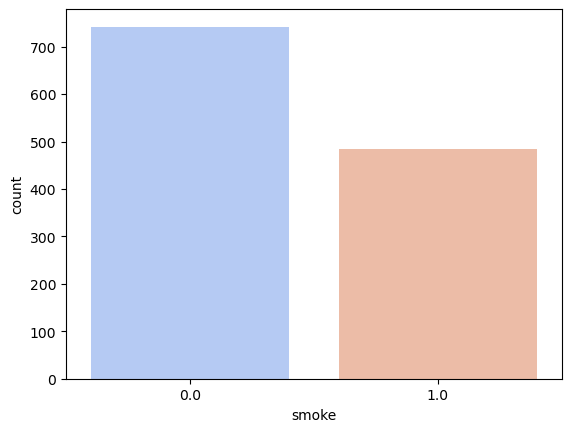

In [11]:
sns.countplot(data = df, x = 'smoke', palette = 'coolwarm')
plt.show()

We can see that the number of smokers is lower than the non smokers, but still fairly high for a study of pregnant women.

Now, we will take a look at the distribution of the duration of the pregnancys.

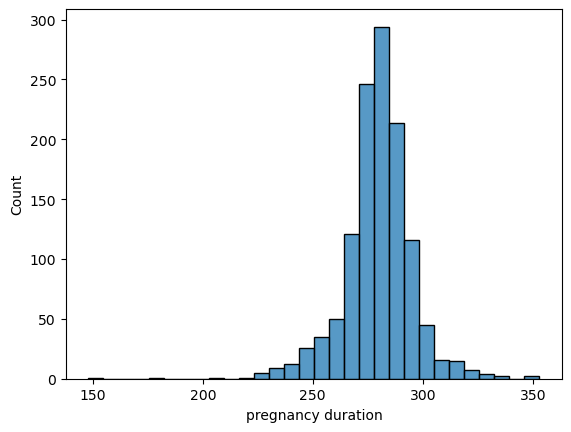

In [12]:
sns.histplot(df['pregnancy duration'], bins = 30, edgecolor = 'black')
plt.show()

We can see that the avarage duration is approximately 280 days. Let's check the real mean value.

In [13]:
df['pregnancy duration'].mean()

279.3385118560916

The avarage duration is around 279.3 days. For convenience, we will round it up to 280.

We can see that wether it was the first pregnancy or not, it didn't had much of an influence on the avarage duration of the pregnancy.  
Although, we can see that the range of pregnancy's duration is much more wide in the first pregnancy.

We want to find any correlation between smoking and the data of the newborns.

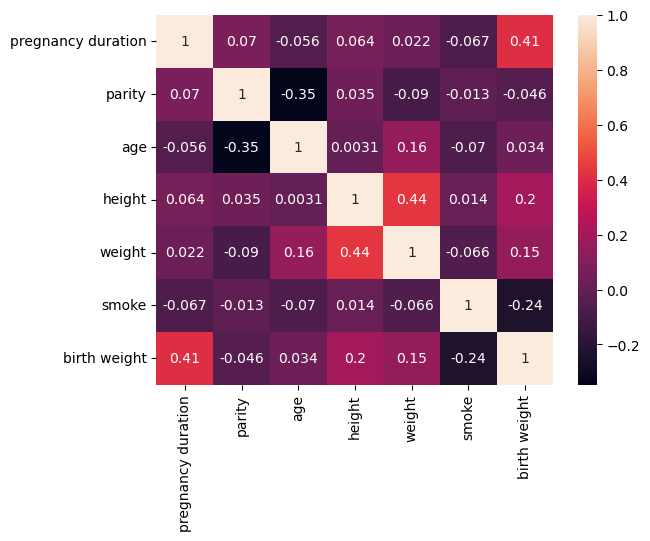

In [14]:
sns.heatmap(data = df.drop('case', axis = 1).corr(numeric_only=True), annot=True)
plt.show()

We can look at several points here and assume some interesting assumptions.

Obviously, the longer the pregnancy took, the heavier the babt was born.  
Also, there's a strong relation between the mother's height and weight.

Another immidiet correlation is between the age of the mother and wether it is her first born or not.

We can see that smoking mothers relates oppositly to the newborn's birth weight. We will remember it later on the project, when we
will want to anticipate the newborn's birth weight based on our data.  
Something else we can see that affects the newborn's weight is the mother's weight and height.

C:\Users\Tamir\AppData\Local\Temp\ipykernel_26948\3884160047.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'parity', y = 'birth weight', palette = 'coolwarm')


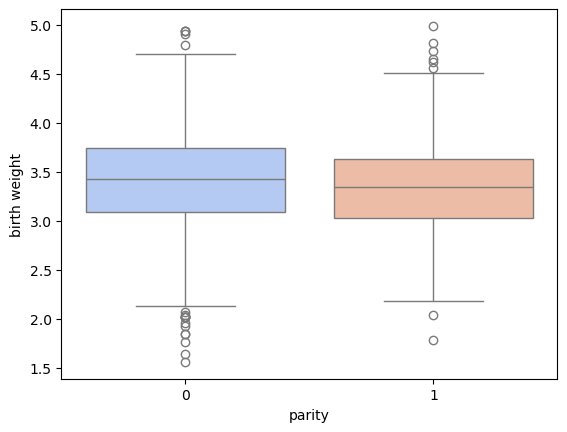

In [15]:
sns.boxplot(data = df, x = 'parity', y = 'birth weight', palette = 'coolwarm')
plt.show()

We can see that wether it was the first pregnancy or not, it didn't had much of an influence on the avarage duration of the pregnancy.  
Although, we can see that the range of pregnancy's duration is much more wide in the first pregnancy.

C:\Users\Tamir\AppData\Local\Temp\ipykernel_26948\3609162939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = 'birth weight', x = 'smoke', palette= 'rainbow')


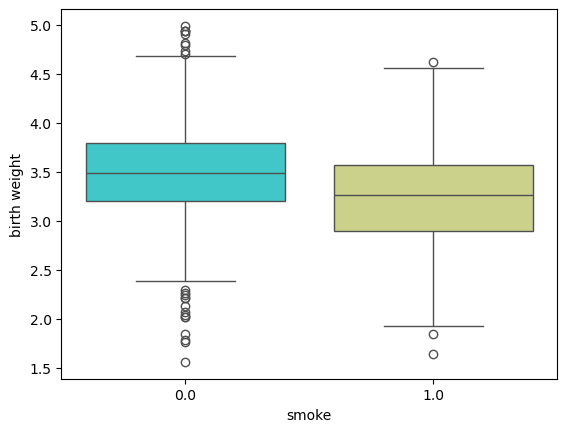

In [16]:
sns.boxplot(data = df, y = 'birth weight', x = 'smoke', palette= 'rainbow')
plt.show()

The smokers delivered a much smaller babies  than the non-smokers, as we can obviously see from the graph. It means that smoking may be a strong variable in case we want to predict the newborn's weight.

C:\Users\Tamir\AppData\Local\Temp\ipykernel_26948\1399404647.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = 'birth weight', x = 'parity', palette= 'rainbow')


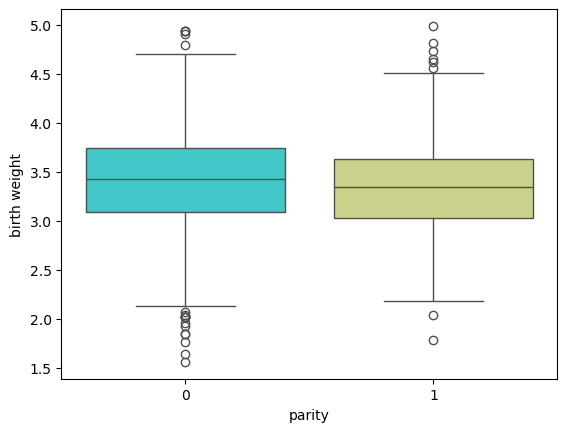

In [17]:
sns.boxplot(data = df, y = 'birth weight', x = 'parity', palette= 'rainbow')
plt.show()

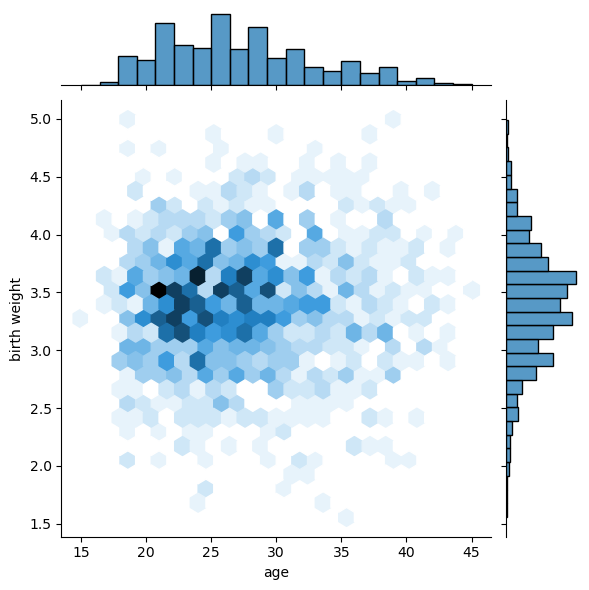

In [18]:
sns.jointplot(data = df, x = 'age', y = 'birth weight', kind = 'hex')
plt.show()

The most common age range for women to give birth is 20-25 years old, and the most common baby weigth is around 3.5 kg.

We want to predict wether the newborn will be born underweight. According to WHO, a baby born under 2.5 kg is considered underweight, so we will create a new binary variable column of underweight kids

In [19]:
df['low birth weight'] = (df['birth weight'] < 2.5).astype(int)

In [20]:
df.head()

,case,pregnancy duration,parity,age,height,weight,smoke,birth weight,low birth weight
0,1,284.0,0,27.0,157.48,45.359237,0.0,3.401943,0
1,2,282.0,0,33.0,162.56,61.234970,0.0,3.203496,0
2,3,279.0,0,28.0,162.56,52.163123,1.0,3.628739,0
3,4,NaN,0,36.0,175.26,86.182550,0.0,3.486991,0
4,5,282.0,0,23.0,170.18,56.699046,1.0,3.061748,0


In [21]:
df['low birth weight'].value_counts()

low birth weight
0    1173
1      63
Name: count, dtype: int64

Now, lets look at the correlation following the new column.

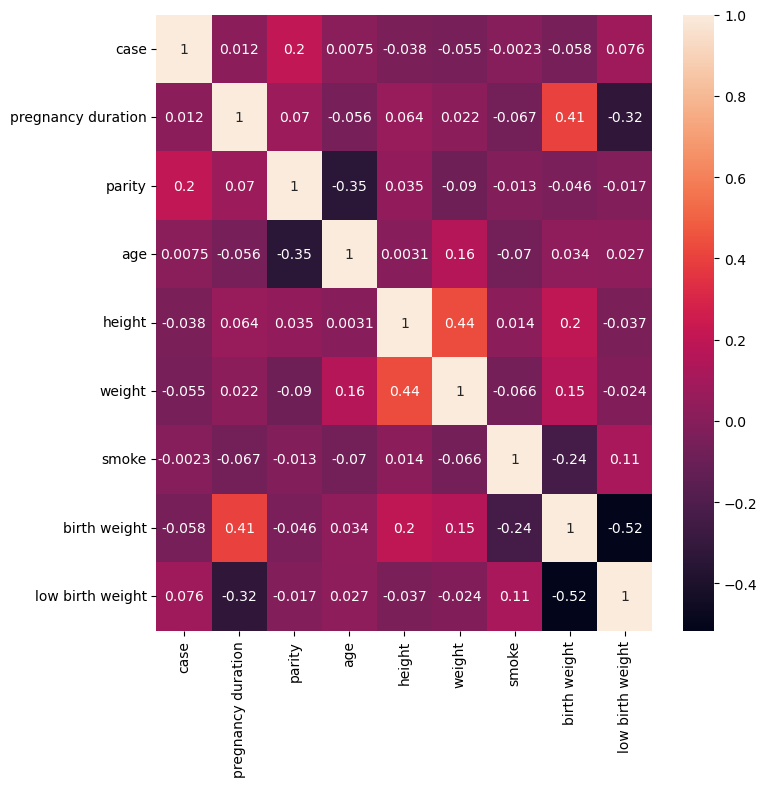

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

The main factor that correlates positively with low birth weight is smoking. That's a strong clue that will benefit us to predict wether a child is born underweight or overweight.  
The other factor is the age of the mother. That can lead us to the assumption that the older a woman is, the higher risk her baby will be born underweight.

Test